In [25]:
# import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt





In [26]:
# import source data files

deaths_2013_2014 = pd.read_csv("raw_data/OD_2013_2014.csv", thousands=',')
deaths_2015 = pd.read_csv("raw_data/OD_2015.csv", thousands=',')
deaths_2016 = pd.read_csv("raw_data/OD_2016.csv", thousands=',')
deaths_2017 = pd.read_csv("raw_data/OD_2017.csv", thousands=',')

regions = pd.read_csv("raw_data/regions.csv", thousands=',')

# reduce dataframes to include only state and death statistic
#############THESE ARE THE OVERDOSE BY STATE DATA FRAMES *********************
deaths_2013_df = deaths_2013_2014[['State', '2013Number']]
deaths_2013_df = deaths_2013_df.rename(index=str, columns={"2013Number": "2013Deaths"})
# deaths_2013_df["2013Deaths"] = pd.to_numeric(deaths_2013_df["2013Deaths"])
deaths_2014_df = deaths_2013_2014[['State', '2014Number']]
deaths_2014_df = deaths_2014_df.rename(index=str, columns={"2014Number": "2014Deaths"})
deaths_2015_df = deaths_2015[['State', 'Number']]
deaths_2015_df = deaths_2015_df.rename(index=str, columns={"Number": "2015Deaths"})
deaths_2016_df = deaths_2016[['State', 'number']]
deaths_2016_df = deaths_2016_df.rename(index=str, columns={"number": "2016Deaths"})
deaths_2017_df = deaths_2017[['State', 'number']]
deaths_2017_df = deaths_2017_df.rename(index=str, columns={"number": "2017Deaths"})

deaths_2013_df.head()



,State,2013Deaths
0,ND,20
1,NE,117
2,SD,55
3,IA,275
4,TX,2446


In [27]:
# import perscription data
rx_2013 = pd.read_csv("raw_data/RX_2013.csv")
rx_2014 = pd.read_csv("raw_data/RX_2014.csv")
rx_2015 = pd.read_csv("raw_data/RX_2015.csv")
rx_2016 = pd.read_csv("raw_data/RX_2016.csv")
rx_2017 = pd.read_csv("raw_data/RX_2017.csv")

# reduce dataframes to include only state and death statistic 
rx_2013_df = rx_2013[['State ABBR', '2013 Prescribing Rate']]
rx_2013_df = rx_2013_df.rename(index=str, columns={"State ABBR": "State", "2013 Prescribing Rate": "2013_RX_rate"})
rx_2014_df = rx_2014[['State ABBR', '2014 Prescribing Rate']]
rx_2014_df = rx_2014_df.rename(index=str, columns={"State ABBR": "State", "2014 Prescribing Rate": "2014_RX_rate"})
rx_2015_df = rx_2015[['State ABBR', '2015 Prescribing Rate']]
rx_2015_df = rx_2015_df.rename(index=str, columns={"State ABBR": "State", "2015 Prescribing Rate": "2015_RX_rate"})
rx_2016_df = rx_2016[['State ABBR', '2016 Prescribing Rate']]
rx_2016_df = rx_2016_df.rename(index=str, columns={"State ABBR": "State", "2016 Prescribing Rate": "2016_RX_rate"})
rx_2017_df = rx_2017[['Abbreviation', 'Year 2017']].drop([51], axis=0).reset_index(drop=True)
rx_2017_df = rx_2017_df.rename(index=str, columns={"Abbreviation": "State", "Year 2017": "2017_RX_rate"})

# drop last row in rx_2017 becuase it is a duplicate entry (WY)
# rx_2017_df = rx_2017_df.drop([51], axis=0).reset_index()

#######THESE ARE THE PERSCRIPTION BY STATE DATA FRAMES*******************
# rx_2013_df
# rx_2014_df
# rx_2015_df
# rx_2016_df
# rx_2017_df


rx_2017_df.head()

,State,2017_RX_rate
0,AL,107.2
1,AK,52.0
2,AZ,61.2
3,AR,105.4
4,CA,39.5


In [28]:
# import population data
population2010_2017 = pd.read_csv("raw_data/Pop_2013-2017.csv", thousands=',')
# remove first two rows because they are insignificant to the dataframe
population2010_2017_a = population2010_2017.drop([0,1,2,3,4,56,57,58,59,60,61,62], axis=0).reset_index(drop=True)
# rename column headers
population2010_2017_a = population2010_2017_a.rename(index=str, columns={"Unnamed: 0": "State", "2013": "2013_Pop", "2014": "2014_Pop", "2015": "2015_Pop", "2016": "2016_Pop", "2017": "2017_Pop"})
# create dataframe with new column names
pop_2010_2017_df = pd.DataFrame(population2010_2017_a)
pop_2010_2017_df = pop_2010_2017_df.replace({'.Alabama': 'AL',
                                             '.Alaska': 'AK', 
                                             '.Arizona': 'AZ',
                                             '.Arkansas': 'AR',
                                             '.California': 'CA',
                                             '.Colorado': 'CO',
                                             '.Connecticut': 'CT',
                                             '.Delaware': 'DE',
                                             '.District of Columbia': 'DC',
                                             '.Florida': 'FL',
                                             '.Georgia': 'GA',
                                             '.Hawaii': 'HI',
                                             '.Idaho': 'ID',
                                             '.Illinois': 'IL',
                                             '.Indiana': 'IN',
                                             '.Iowa': 'IA',
                                             '.Kansas': 'KS',
                                             '.Kentucky': 'KY',
                                             '.Louisiana':'LA',
                                             '.Maine': 'ME',
                                             '.Maryland':'MD',
                                             '.Massachusetts':'MA',
                                             '.Michigan':'MI',
                                             '.Minnesota':'MN',
                                             '.Mississippi':'MS',
                                             '.Missouri':'MO',
                                             '.Montana':'MT',
                                             '.Nebraska':'NE',
                                             '.Nevada':'NV',
                                             '.New Hampshire':'NH',
                                             '.New Jersey':'NJ',
                                             '.New Mexico':'NM',
                                             '.New York':'NY',
                                             '.North Carolina':'NC',
                                             '.North Dakota':'ND',
                                             '.Ohio':'OH',
                                             '.Oklahoma':'OK',
                                             '.Oregon':'OR',
                                             '.Pennsylvania':'PA',
                                             '.Rhode Island':'RI',
                                             '.South Carolina':'SC',
                                             '.South Dakota':'SD',
                                             '.Tennessee':'TN',
                                             '.Texas':'TX',
                                             '.Utah':'UT',
                                             '.Vermont':'VT',
                                             '.Virginia':'VA',
                                             '.Washington':'WA',
                                             '.West Virginia':'WV',
                                             '.Wisconsin':'WI',
                                             '.Wyoming':'WY'})
######THIS IS THE POPULATION DATA FRAME******************************
# pop_2010_2017_df

# merge regions
pop_2010_2017_df = pop_2010_2017_df.merge(regions)

pop_2010_2017_df.head()

,State,2013_Pop,2014_Pop,2015_Pop,2016_Pop,2017_Pop,Region
0,AL,4827660.0,4840037.0,4850858.0,4860545.0,4874747.0,Southeast
1,AK,736760.0,736759.0,737979.0,741522.0,739795.0,Far West
2,AZ,6616124.0,6706435.0,6802262.0,6908642.0,7016270.0,Southwest
3,AR,2956780.0,2964800.0,2975626.0,2988231.0,3004279.0,Southeast
4,CA,38347383.0,38701278.0,39032444.0,39296476.0,39536653.0,Far West


In [29]:
# merge population_df, rx_dfs, and deaths_dfs (prd = population rx deaths)
# prd_df = pop_2010_2017_df.merge(rx_2013_df).merge(deaths_2013_df).merge(rx_2014_df).merge(deaths_2014_df).merge(rx_2015_df).merge(deaths_2015_df).merge(rx_2016_df).merge(deaths_2016_df).merge(rx_2017_df).merge(deaths_2017_df)

# merge 2013 tables
prd_13_df = pop_2010_2017_df.merge(rx_2013_df).merge(deaths_2013_df)
# merge 2013-2014 tables
prd_14_df = prd_13_df.merge(rx_2014_df).merge(deaths_2014_df)
# merge 2013-2015 tables
prd_15_df = prd_14_df.merge(rx_2015_df).merge(deaths_2015_df)
# merge 2013-2016 tables
prd_16_df = prd_15_df.merge(rx_2016_df).merge(deaths_2016_df)
# merge 2013-2017 tables
prd_17_df = prd_16_df.merge(rx_2017_df).merge(deaths_2017_df)


prd_17_df.head()


,State,2013_Pop,2014_Pop,2015_Pop,2016_Pop,2017_Pop,Region,2013_RX_rate,2013Deaths,2014_RX_rate,2014Deaths,2015_RX_rate,2015Deaths,2016_RX_rate,2016Deaths,2017_RX_rate,2017Deaths
0,AL,4827660.0,4840037.0,4850858.0,4860545.0,4874747.0,Southeast,142.4,598,135.2,723,125.0,736,121.0,756,107.2,835
1,AK,736760.0,736759.0,737979.0,741522.0,739795.0,Far West,63.7,105,62.7,124,60.8,122,58.9,128,52.0,147
2,AZ,6616124.0,6706435.0,6802262.0,6908642.0,7016270.0,Southwest,80.4,1222,79.7,1211,75.5,1274,70.2,1382,61.2,1532
3,AR,2956780.0,2964800.0,2975626.0,2988231.0,3004279.0,Southeast,120.9,319,123.2,356,117.2,392,114.6,401,105.4,446
4,CA,38347383.0,38701278.0,39032444.0,39296476.0,39536653.0,Far West,54.4,4452,52.7,4521,47.7,4659,44.8,4654,39.5,4868


In [30]:
# change column locations and create the final consolidated dataframe called "master_df"
master_df = pd.DataFrame(prd_17_df[['State','Region',
                                    '2013_Pop','2013_RX_rate','2013Deaths',
                                    '2014_Pop','2014_RX_rate','2014Deaths',
                                    '2015_Pop','2015_RX_rate','2015Deaths',
                                    '2016_Pop','2016_RX_rate','2016Deaths',
                                    '2017_Pop','2017_RX_rate','2017Deaths']])

# convert population column values to integers for downstream statistical analysis
master_df['2013_Pop'] = master_df['2013_Pop'].apply(int)
master_df['2014_Pop'] = master_df['2014_Pop'].apply(int)
master_df['2015_Pop'] = master_df['2015_Pop'].apply(int)
master_df['2016_Pop'] = master_df['2016_Pop'].apply(int)
master_df['2017_Pop'] = master_df['2017_Pop'].apply(int)
master_df.head()

,State,Region,2013_Pop,2013_RX_rate,2013Deaths,2014_Pop,2014_RX_rate,2014Deaths,2015_Pop,2015_RX_rate,2015Deaths,2016_Pop,2016_RX_rate,2016Deaths,2017_Pop,2017_RX_rate,2017Deaths
0,AL,Southeast,4827660,142.4,598,4840037,135.2,723,4850858,125.0,736,4860545,121.0,756,4874747,107.2,835
1,AK,Far West,736760,63.7,105,736759,62.7,124,737979,60.8,122,741522,58.9,128,739795,52.0,147
2,AZ,Southwest,6616124,80.4,1222,6706435,79.7,1211,6802262,75.5,1274,6908642,70.2,1382,7016270,61.2,1532
3,AR,Southeast,2956780,120.9,319,2964800,123.2,356,2975626,117.2,392,2988231,114.6,401,3004279,105.4,446
4,CA,Far West,38347383,54.4,4452,38701278,52.7,4521,39032444,47.7,4659,39296476,44.8,4654,39536653,39.5,4868


In [31]:
# normalize deaths by dividing by 100,000
# master_df['2013Deaths'] = master_df['2013Deaths'] / (master_df['2013_Pop'] / 100000)
# master_df['2014Deaths'] = master_df['2014Deaths'] / (master_df['2014_Pop'] / 100000)
# master_df['2015Deaths'] = master_df['2015Deaths'] / (master_df['2015_Pop'] / 100000)
# master_df['2016Deaths'] = master_df['2016Deaths'] / (master_df['2016_Pop'] / 100000)
# master_df['2017Deaths'] = master_df['2017Deaths'] / (master_df['2017_Pop'] / 100000)

In [32]:
# subset master dataframe into regional data frames by economic region
southeast = master_df[master_df.Region == 'Southeast'].reset_index(drop=True)
southwest = master_df[master_df.Region == 'Southwest'].reset_index(drop=True)
farwest = master_df[master_df.Region == 'Far West'].reset_index(drop=True)
rockmount = master_df[master_df.Region == 'Rocky Mountain'].reset_index(drop=True)
plains = master_df[master_df.Region == 'Plains'].reset_index(drop=True)
greatlakes = master_df[master_df.Region == 'Great Lakes'].reset_index(drop=True)
mideast = master_df[master_df.Region == 'Mideast'].reset_index(drop=True)
newengland = master_df[master_df.Region == 'New England'].reset_index(drop=True)



newengland

,State,Region,2013_Pop,2013_RX_rate,2013Deaths,2014_Pop,2014_RX_rate,2014Deaths,2015_Pop,2015_RX_rate,2015Deaths,2016_Pop,2016_RX_rate,2016Deaths,2017_Pop,2017_RX_rate,2017Deaths
0,CT,New England,3602470,67.4,582,3600188,66.0,623,3593862,62.3,800,3587685,55.9,971,3588184,48.0,1072
1,ME,New England,1327975,85.9,174,1328903,82.4,216,1327787,76.5,269,1330232,66.9,353,1335907,55.7,424
2,MA,New England,6711138,63.0,1081,6757925,59.6,1289,6794002,54.0,1724,6823721,47.1,2227,6859819,40.1,2168
3,NH,New England,1322622,82.0,203,1328684,79.6,334,1330134,74.8,422,1335015,64.3,481,1342795,52.8,467
4,RI,New England,1052784,76.9,241,1054782,72.8,247,1055916,65.7,310,1057566,60.3,326,1059639,51.2,320
5,VT,New England,626044,52.2,93,625665,50.4,83,624455,60.1,99,623354,58.6,125,623657,50.5,134


In [33]:
# create descriptive stats summary table

master_range_max = master_df.max()
master_range_min = master_df.min()
master_mean = master_df.mean().apply(int)
master_median = master_df.median().apply(int)
master_stdev = master_df.std()
master_var = master_df.var().apply(int)
master_count = master_df.count()
master_sum = master_df.sum()
master_df.describe()
# master_sum_stats_df = pd.DataFrame(master_df.describe())
# master_sum_stats_df
master_stdev



2013_Pop        7.042373e+06
2013_RX_rate    2.300858e+01
2013Deaths      8.495370e+02
2014_Pop        7.116417e+06
2014_RX_rate    2.203779e+01
2014Deaths      8.969728e+02
2015_Pop        7.191254e+06
2015_RX_rate    2.011219e+01
2015Deaths      1.004341e+03
2016_Pop        7.257151e+06
2016_RX_rate    1.937365e+01
2016Deaths      1.267198e+03
2017_Pop        7.316763e+06
2017_RX_rate    1.764824e+01
2017Deaths      1.419685e+03
dtype: float64

In [34]:
# create table of correlations
# labels = ['2013_Pop', '2013_RX_rate', '2013Deaths', '2014_Pop', '2014_RX_rate', '2014Deaths',
#           '2015_Pop', '2015_RX_rate', '2015Deaths', '2016_Pop', '2016_RX_rate', '2016Deaths',
#           '2017_Pop', '2017_RX_rate', '2017Deaths']

# fig = plt.figure()
# ax = fig.add_subplot(111)
# stats_corr = ax.matshow(master_df, interpolation='nearest')
# fig.colorbar(stats_corr)

# ax.set_xticklabels(['']+labels)
# ax.set_yticklabels(['']+labels)

# # plt.matshow(master_df.corr())

# plt.show()

In [35]:
# create table of correlations


table_of_correlations = master_df.corr()
table_of_correlations


,2013_Pop,2013_RX_rate,2013Deaths,2014_Pop,2014_RX_rate,2014Deaths,2015_Pop,2015_RX_rate,2015Deaths,2016_Pop,2016_RX_rate,2016Deaths,2017_Pop,2017_RX_rate,2017Deaths
2013_Pop,1.000000,-0.195110,0.953731,0.999974,-0.208032,0.940556,0.999877,-0.224612,0.911499,0.999710,-0.199262,0.847964,0.999515,-0.184175,0.823332
2013_RX_rate,-0.195110,1.000000,-0.101666,-0.195328,0.995509,-0.084076,-0.195384,0.987311,-0.090263,-0.195168,0.973672,-0.108591,-0.194853,0.958200,-0.098709
2013Deaths,0.953731,-0.101666,1.000000,0.952623,-0.115624,0.996371,0.951359,-0.130501,0.985060,0.950226,-0.116060,0.941391,0.949323,-0.113701,0.926688
2014_Pop,0.999974,-0.195328,0.952623,1.000000,-0.208235,0.939371,0.999964,-0.224951,0.910074,0.999857,-0.199492,0.846308,0.999711,-0.184161,0.821455
2014_RX_rate,-0.208032,0.995509,-0.115624,-0.208235,1.000000,-0.097864,-0.208264,0.992781,-0.103196,-0.208000,0.979757,-0.121393,-0.207639,0.965200,-0.110598
2014Deaths,0.940556,-0.084076,0.996371,0.939371,-0.097864,1.000000,0.938026,-0.114128,0.993040,0.936843,-0.102618,0.956347,0.935928,-0.103768,0.943609
2015_Pop,0.999877,-0.195384,0.951359,0.999964,-0.208264,0.938026,1.000000,-0.225113,0.908501,0.999964,-0.199499,0.844564,0.999877,-0.183870,0.819466
2015_RX_rate,-0.224612,0.987311,-0.130501,-0.224951,0.992781,-0.114128,-0.225113,1.000000,-0.118017,-0.224954,0.992811,-0.133438,-0.224677,0.979272,-0.121221
2015Deaths,0.911499,-0.090263,0.985060,0.910074,-0.103196,0.993040,0.908501,-0.118017,1.000000,0.907172,-0.109052,0.980850,0.906151,-0.113314,0.970793
2016_Pop,0.999710,-0.195168,0.950226,0.999857,-0.208000,0.936843,0.999964,-0.224954,0.907172,1.000000,-0.199184,0.843179,0.999974,-0.183284,0.817881


In [36]:
# create odds ratios by region (odds of death from overdose from target region compared to all other regions)
# calculate deaths by region, from 2013 through 2017
deaths_southeast = southeast[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_southeast = deaths_southeast.sum()

deaths_southwest = southwest[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_southwest = deaths_southwest.sum()

deaths_farwest = farwest[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_farwest = deaths_farwest.sum()

deaths_rockmount = rockmount[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_rockmount = deaths_rockmount.sum()

deaths_plains = plains[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_plains = deaths_plains.sum()

deaths_greatlakes = greatlakes[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_greatlakes = deaths_greatlakes.sum()

deaths_mideast = mideast[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_mideast = deaths_mideast.sum()

deaths_newengland = newengland[['2013Deaths', '2014Deaths', '2015Deaths', '2016Deaths', '2017Deaths']].apply(sum)
total_deaths_newengland = deaths_newengland.sum()

# calculate total population by region, from 2013 through 2017 
pop_southeast = southeast[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_southeast = pop_southeast.sum()

pop_southwest = southwest[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_southwest = pop_southwest.sum()

pop_farwest = farwest[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_farwest = pop_farwest.sum()

pop_rockmount = rockmount[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_rockmount = pop_rockmount.sum()

pop_plains = plains[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_plains = pop_plains.sum()

pop_greatlakes = greatlakes[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_greatlakes = pop_greatlakes.sum()

pop_mideast = mideast[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_mideast = pop_mideast.sum()

pop_newengland = newengland[['2013_Pop', '2014_Pop','2015_Pop','2016_Pop','2017_Pop',]].apply(sum)
total_pop_newengland = pop_newengland.sum()

# calculate combined population for all regions, for entire period of analysis
combined_pop = total_pop_southwest + total_pop_southeast + total_pop_farwest + total_pop_rockmount + total_pop_plains + total_pop_greatlakes + total_pop_mideast + total_pop_newengland
combined_pop

# calculate nots for each region in the odds table
death_not_southeast = total_pop_southeast - total_deaths_southeast
death_not_southwest = total_pop_southwest - total_deaths_southwest
death_not_farwest = total_pop_farwest - total_deaths_farwest
death_not_rockmount = total_pop_rockmount - total_deaths_rockmount
death_not_plains = total_pop_plains - total_deaths_plains
death_not_greatlakes = total_pop_greatlakes - total_deaths_greatlakes
death_not_mideast = total_pop_mideast - total_deaths_mideast
death_not_newengland = total_pop_newengland - total_deaths_newengland

# calculate not nots for all other regions in odds table

combined_not_deaths = death_not_southeast + death_not_southwest + death_not_farwest + death_not_rockmount + death_not_plains + death_not_greatlakes + death_not_mideast + death_not_newengland

# calculate combined deaths

combined_deaths = total_deaths_southeast + total_deaths_southwest + total_deaths_farwest + total_deaths_rockmount + total_deaths_plains + total_deaths_greatlakes + total_deaths_mideast + total_deaths_newengland
combined_deaths

277310

In [37]:
# create odds ratio table by target region, compared to all other regions for deaths during 2013 - 2017 time period; algorithm is: 
# odds_x = (total_deaths_x * (combined_not_deaths - death_not_x) / (death_not_x * combined_deaths - total_deaths_x) )
odds_southeast = (total_deaths_southeast * (combined_not_deaths - death_not_southeast) / (death_not_southeast * combined_deaths - total_deaths_southeast) )
odds_southwest = (total_deaths_southwest * (combined_not_deaths - death_not_southwest) / (death_not_southwest * combined_deaths - total_deaths_southwest) )
odds_farwest = (total_deaths_farwest * (combined_not_deaths - death_not_farwest) / (death_not_farwest * combined_deaths - total_deaths_farwest) )
odds_rockmount = (total_deaths_rockmount * (combined_not_deaths - death_not_rockmount) / (death_not_rockmount * combined_deaths - total_deaths_rockmount) )
odds_plains = (total_deaths_plains * (combined_not_deaths - death_not_plains) / (death_not_plains * combined_deaths - total_deaths_plains) )
odds_greatlakes = (total_deaths_greatlakes * (combined_not_deaths - death_not_greatlakes) / (death_not_greatlakes * combined_deaths - total_deaths_greatlakes) )
odds_mideast = (total_deaths_mideast * (combined_not_deaths - death_not_mideast) / (death_not_mideast * combined_deaths - total_deaths_mideast) )
odds_newengland = (total_deaths_newengland * (combined_not_deaths - death_not_newengland) / (death_not_newengland * combined_deaths - total_deaths_newengland) )

odds_ratios = [odds_southeast, odds_southwest, odds_farwest, odds_rockmount, odds_plains, odds_greatlakes, odds_mideast, odds_newengland]
odds_ratios

[0.7580205724422964,
 0.6661442149789777,
 0.6179256350300963,
 0.9459880210263087,
 0.6820975779918944,
 1.0611716073791926,
 1.0312381656739615,
 1.339407181179361]

In [38]:
odds_ratio_df = pd.DataFrame({
    'Region': ['Southeast', 'Southwest', 'Far West', 'Rockies', 'Plains', 'Great Lakes', 'Mideast', 'New England'],
    'Odds for Death': [odds_southeast, odds_southwest, odds_farwest, odds_rockmount, odds_plains, odds_greatlakes, odds_mideast, odds_newengland]
})
odds_ratio_df = odds_ratio_df.sort_values(['Odds for Death'], ascending=False).reset_index(drop=True)

odds_ratio_df

,Region,Odds for Death
0,New England,1.339407
1,Great Lakes,1.061172
2,Mideast,1.031238
3,Rockies,0.945988
4,Southeast,0.758021
5,Plains,0.682098
6,Southwest,0.666144
7,Far West,0.617926


<IPython.core.display.Javascript object>


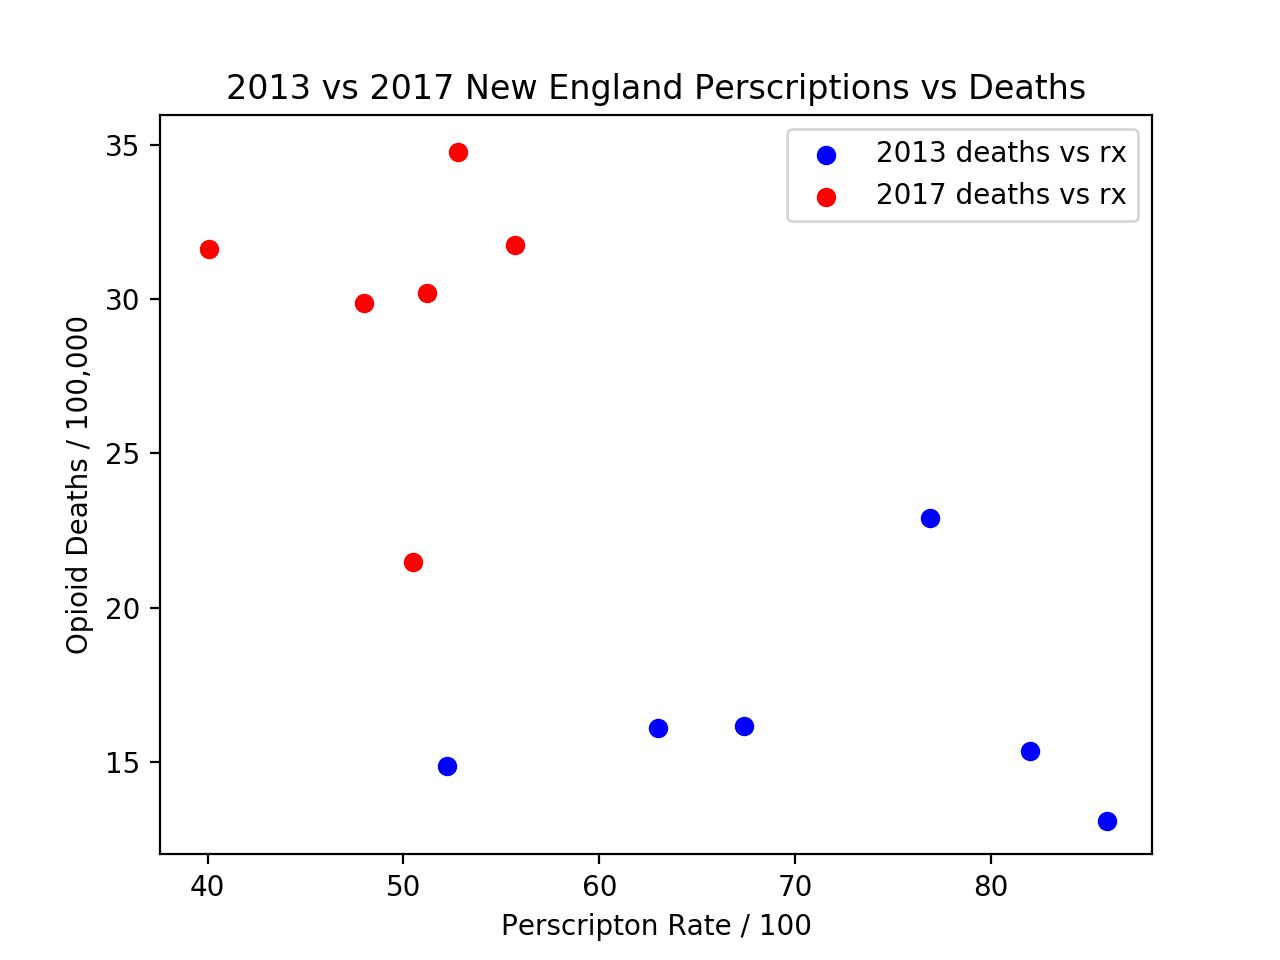

In [432]:
# create scatter plot for New England RX vs Deaths (rx = x; deaths = y)
plt.scatter(newengland['2013_RX_rate'], newengland['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(newengland['2017_RX_rate'], newengland['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 New England Perscriptions vs Deaths')
plt.legend()
plt.savefig("raw_data/NewEnglandPlot.png")
plt.show()

<IPython.core.display.Javascript object>


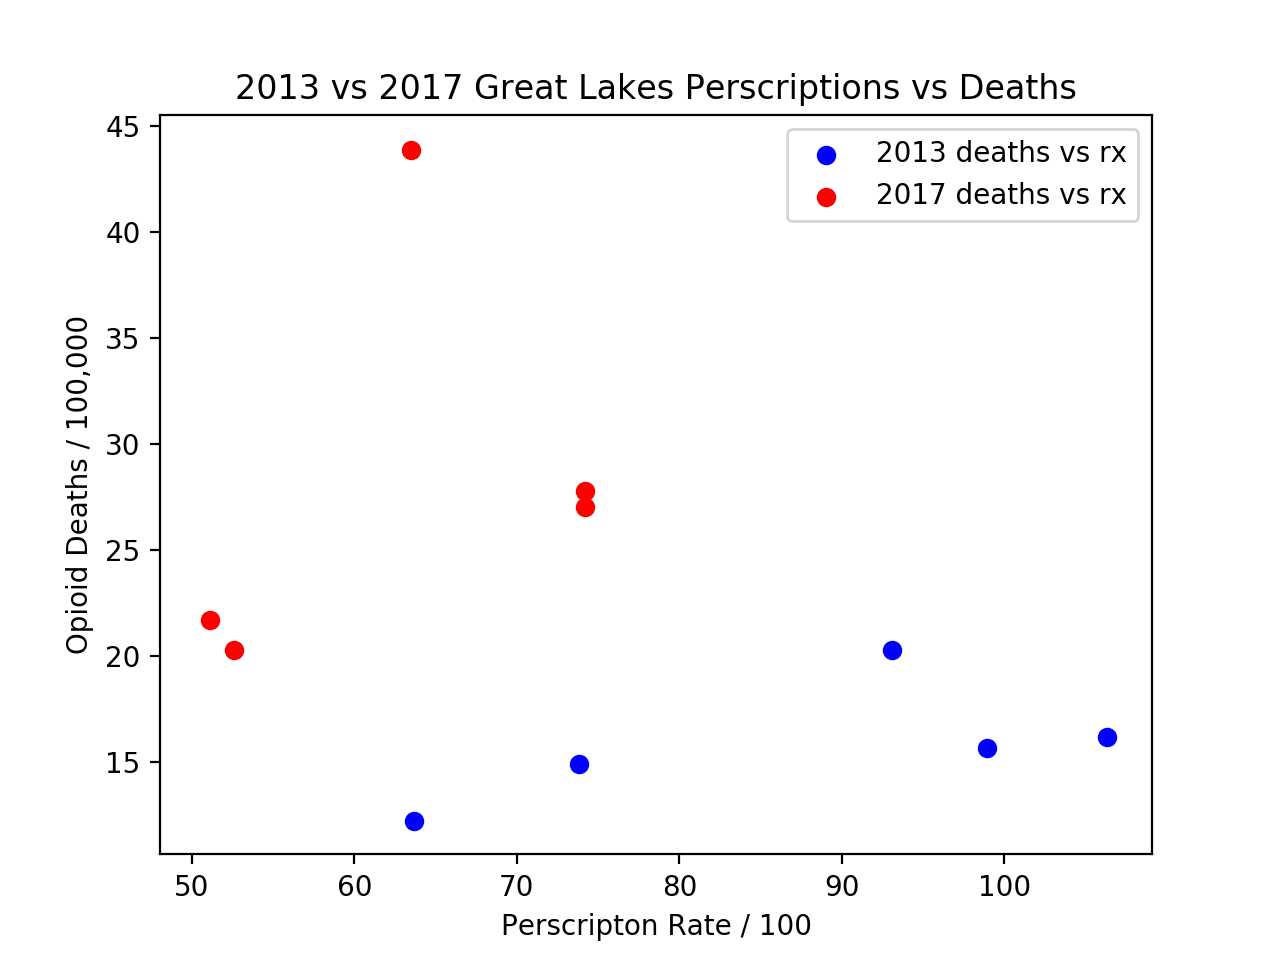

In [433]:
# create scatter plot for Great Lakes RX vs Deaths (rx = x; deaths = y)
plt.scatter(greatlakes['2013_RX_rate'], greatlakes['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(greatlakes['2017_RX_rate'], greatlakes['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Great Lakes Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/GreatLakesPlot.png')
plt.show()

<IPython.core.display.Javascript object>


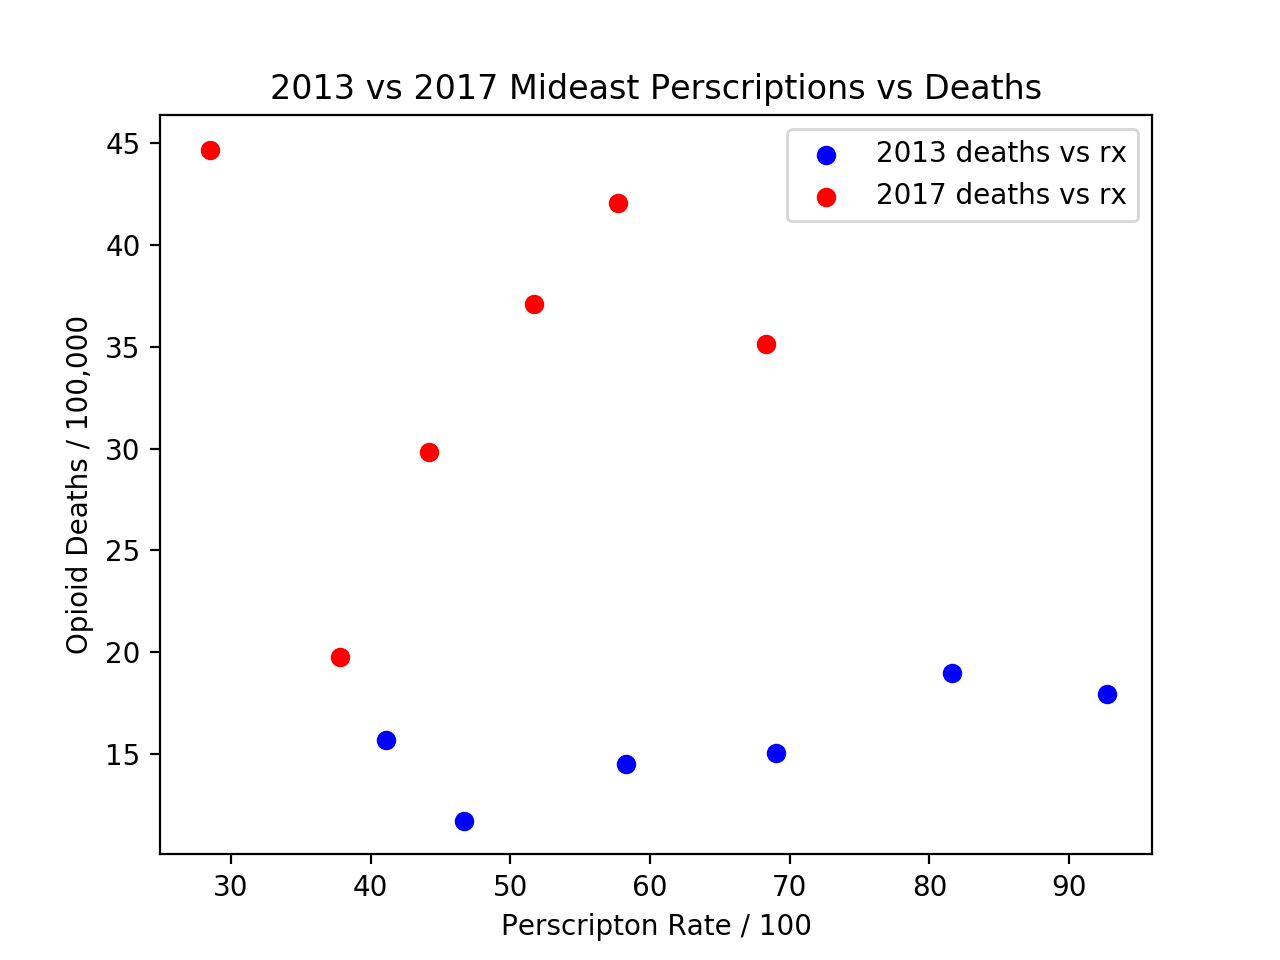

In [434]:
# create scatter plot for Mideast RX vs Deaths (rx = x; deaths = y)
plt.scatter(mideast['2013_RX_rate'], mideast['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(mideast['2017_RX_rate'], mideast['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Mideast Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/MideastPlot.png')
plt.show()

<IPython.core.display.Javascript object>


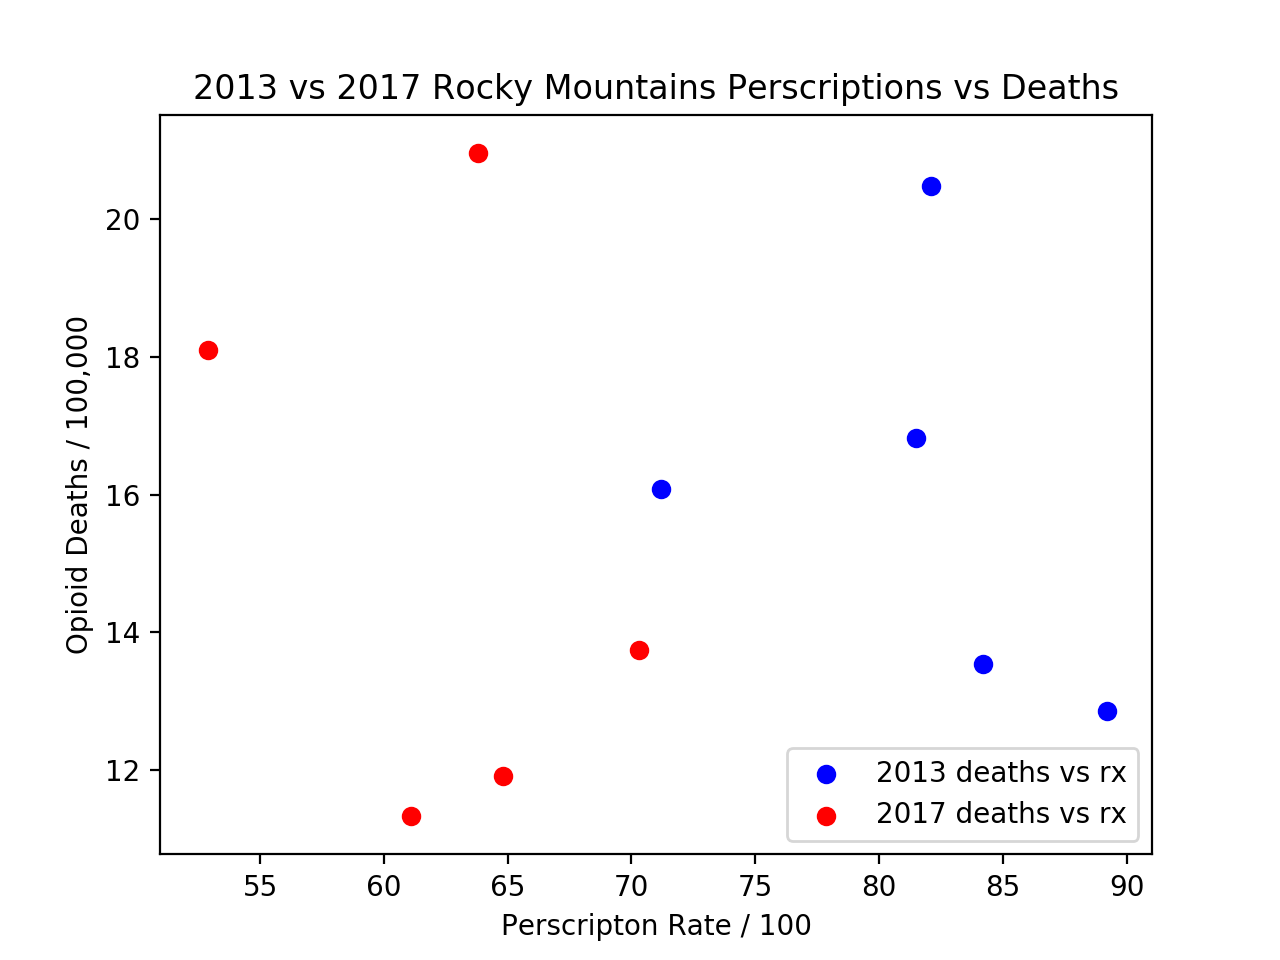

In [435]:
# create scatter plot for Rockies RX vs Deaths (rx = x; deaths = y)
plt.scatter(rockmount['2013_RX_rate'], rockmount['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(rockmount['2017_RX_rate'], rockmount['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Rocky Mountains Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/RockiesPlot.png')
plt.show()

<IPython.core.display.Javascript object>


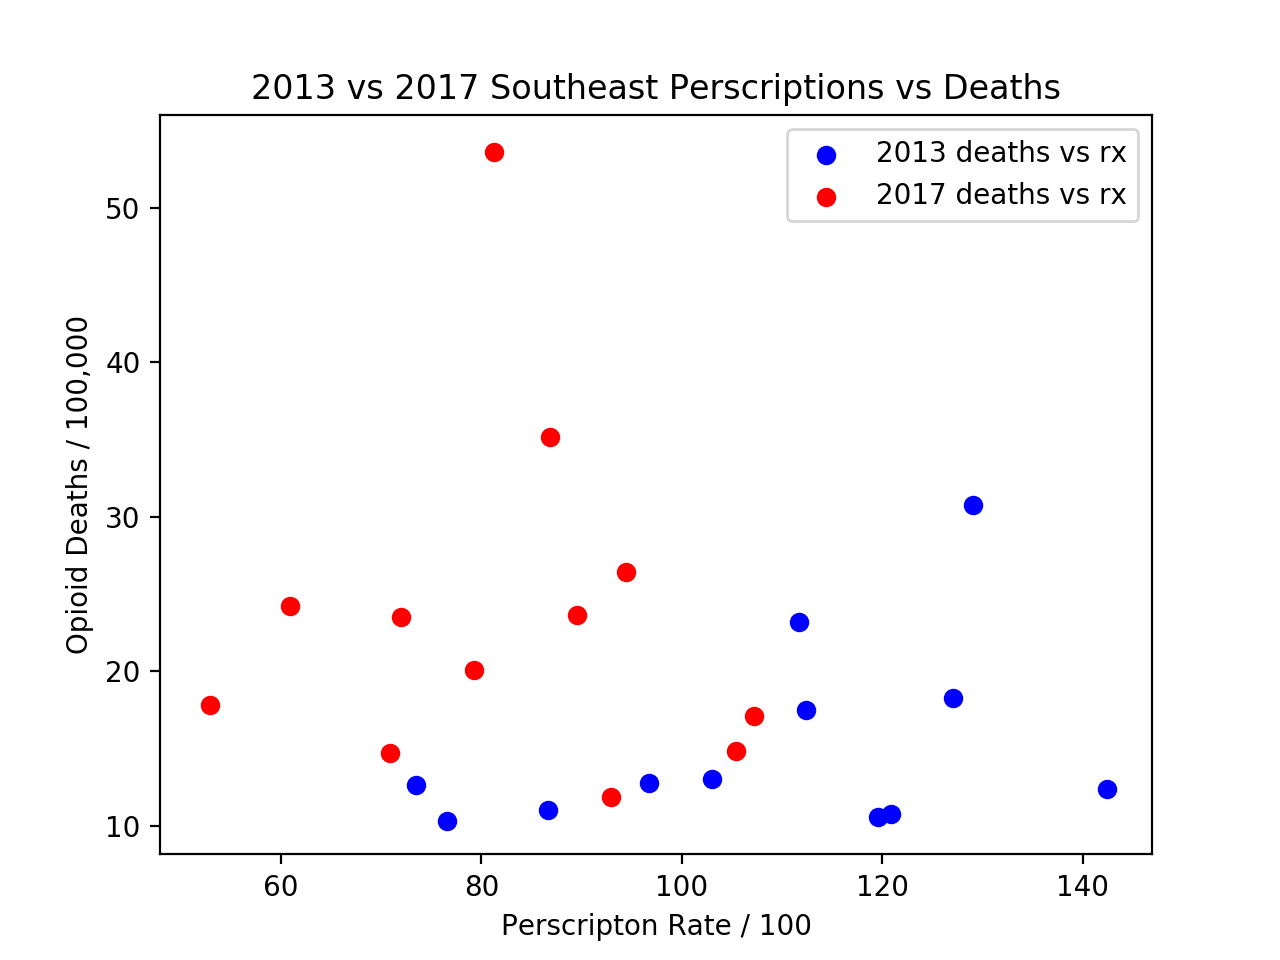

In [436]:
# create scatter plot for Southeast RX vs Deaths (rx = x; deaths = y)
plt.scatter(southeast['2013_RX_rate'], southeast['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(southeast['2017_RX_rate'], southeast['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Southeast Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/SoutheastPlot.png')
plt.show()

<IPython.core.display.Javascript object>


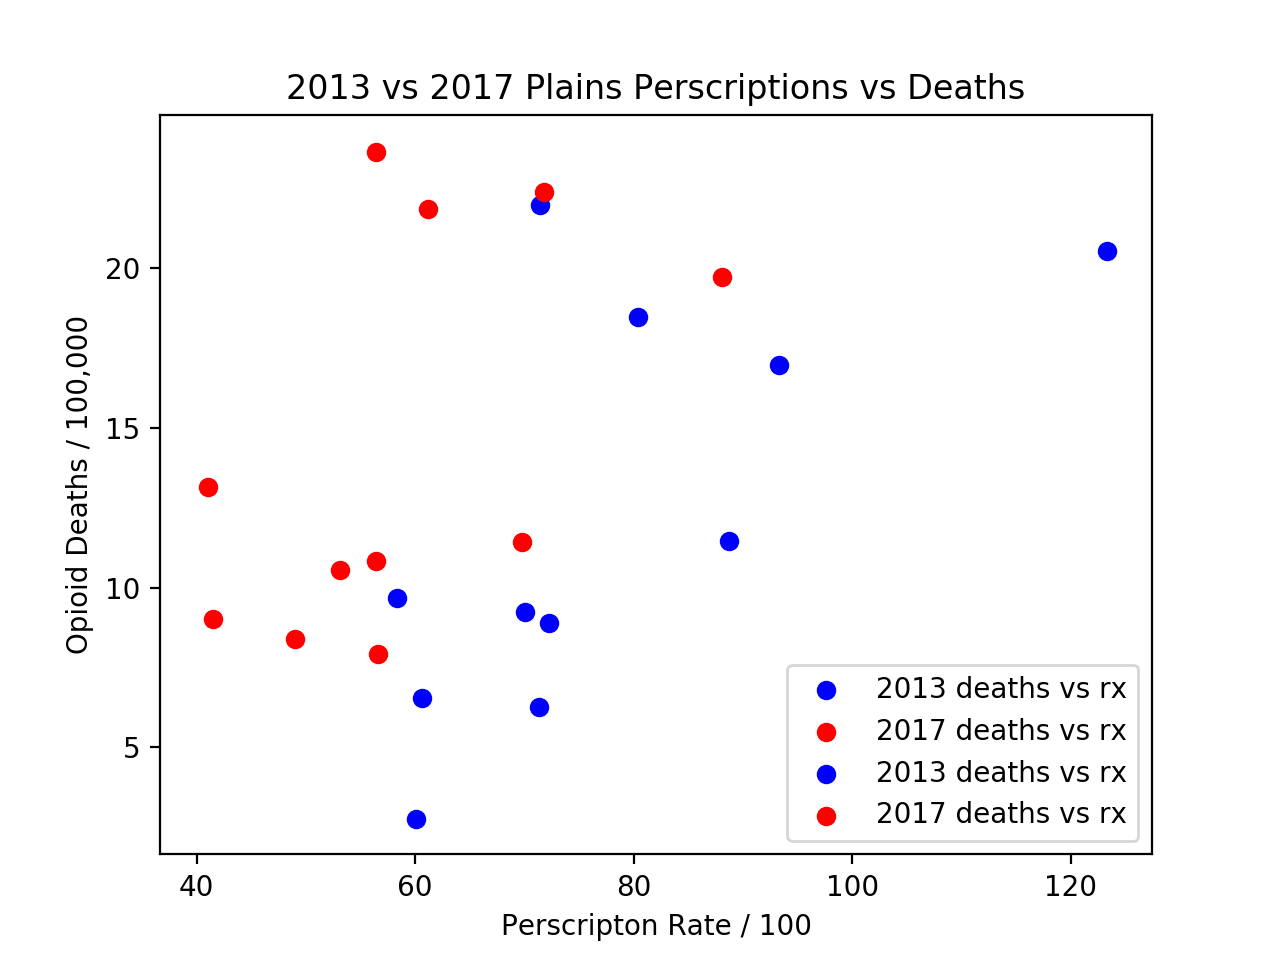

In [437]:
# create scatter plot for Southwest RX vs Deaths (rx = x; deaths = y)
plt.scatter(southwest['2013_RX_rate'], southwest['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(southwest['2017_RX_rate'], southwest['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Southwest Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/SouthwestPlot.png')
plt.show()

In [438]:
# create scatter plot for Plains RX vs Deaths (rx = x; deaths = y)
plt.scatter(plains['2013_RX_rate'], plains['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(plains['2017_RX_rate'], plains['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Plains Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/PlainsPlot.png')
plt.show()

<IPython.core.display.Javascript object>


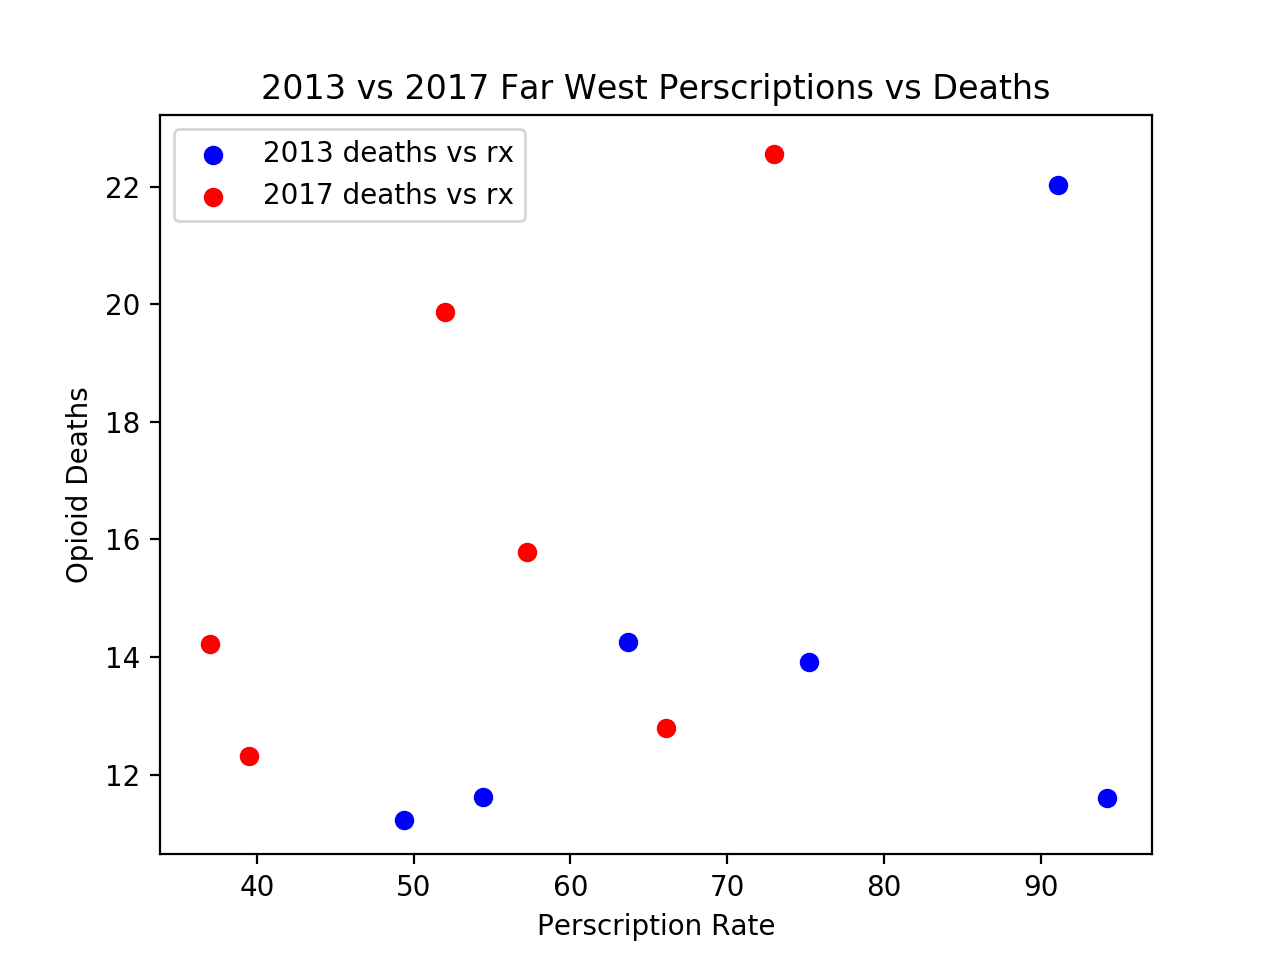

In [428]:
# create scatter plot for Far West RX vs Deaths (rx = x; deaths = y)
plt.scatter(farwest['2013_RX_rate'], farwest['2013Deaths'], c='b', label='2013 deaths vs rx')
plt.scatter(farwest['2017_RX_rate'], farwest['2017Deaths'], c='r', label='2017 deaths vs rx')
plt.xlabel('Perscripton Rate / 100')
plt.ylabel('Opioid Deaths / 100,000')
plt.title('2013 vs 2017 Far West Perscriptions vs Deaths')
plt.legend()
plt.savefig('raw_data/FarWestPlot.png')
plt.show()

In [439]:
export_csv = master_df.to_csv ("master_df.csv", index = None, header=True)